<a href="https://colab.research.google.com/github/chacha715/ESAA_OB/blob/main/%EA%B3%BC%EC%A0%9C_0529_%EB%94%A5%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 4 합성곱 신경망(CNN)

# 01. 합성곱 신경망

* 합성공 신경망(CNN : Convolution Neural Network) : 데이터가 가진 특징들의 패턴을 학습하는 알고리즘
 - 컴퓨터 비전 분야: 이미지 분류, 객체 탐지, 스타일 전이

1. 이미지 분류 문제
- 고양이 또는 강아지 사진으로 모델을 학습시키면, 모델은 이미지의 특징을 추출해 고양이 또는 강아지를 분류할 수 있게 됨
- 즉, 이미지를 인식할 수 있는 능력을 모델이 갖추게 됨
2. 객체 탐지
- 이미지에서 특정한 객체를 인식하고 이미지의 어디에 있는지 위치까지 파악하는 기술
- 경계 박스(bounding box) : 고양이의 이미지 위치에 표시된 노란색 실선
- 인식한 객체가 어떤 클래스에 속하는지 분류 확률과 예측을 함께 알려줌
- 경계 박스를 찾는 문제는 회귀분석으로 해결
- 클래스를 예측하는 문제는 분류 문제
3. 스타일 전이
- 콘텐츠 이미지와 스타일 참조 이미지를 이용해 콘텐츠의 기본 형태를 유지하고 스타일을 입혀 새로운 이미지를 생성하는 기술



## 1-1 이미지 표현
- 이미지를 컴퓨터가 이해할 수 있게 하려면 숫자로 표현해야 함
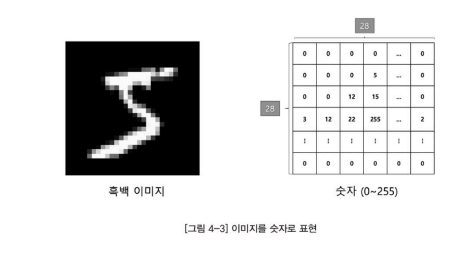

> 흑백 이미지: 화소를 나타내는 숫자는 이미지의 강도를 나타냄
- 숫자 0 : 완전히 검은 색
- 숫자 255: 흰색
- 중간 숫자: 회색
- 숫자가 클수록 더 강한 특성

> 컬러 이미지 : R,G,B 채널로 구성된 3장의 이미지를 겹쳐서 표현
- 각 채널마다 0~255 사이의 숫자
- 숫자가 클수록 해당 색상이 더 강하게 표현
- 채널은 각각이 하나의 이미지로 구분되며, 컬러 이미지는 3개의 채널 이미지를 하나로 결합하여 표현

## 1-2 합성곱(Convolution)

* 합성곱 연산: 입력 이미지에 대하여 일반적으로 정방형 크기를 가지는 **커널**을 사용하여, 입력 이미지에 대한 특성을 추출하는 방법
* 특성맵: 합성곱 연산을 통해서 추출된 이미지
  - 특성맵을 딥러닝 모델에 적용하면 더 좋은 성능
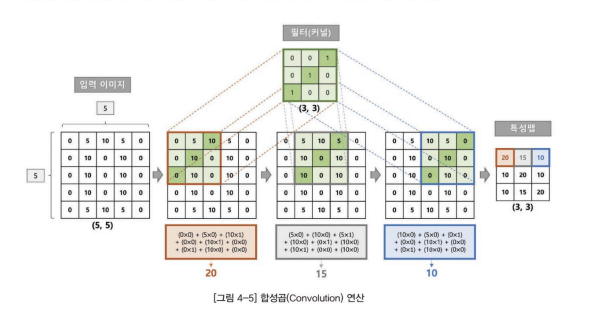


- 입력 이미지의 좌측 상단부터, 커널과 같은 크기를 갖도록 입력 이미지의 일부분에 커널이 겹치게 투영
  - 입력 이미지와 커널이 겹치는 부분에 대하여 합성곱 연산 수행
> 커널 사이즈가 3 * 3 인 경우
>  - 총 9개의 가중치
>  - 오차 역전파시 커널의 가중치 업데이트

합성곱 신경망이 이미지 특성 추출에 효율적인 이유 
- 커널의 공유 가중치
  - 오차 역전파 시 커널의 그래디언트 계산시, 9개에 대해서만 업데이트
  - 완전 연결층 사용 시보다 연산량이 훨씬 적음

## 1-3 채널

* 채널: 입력 이미지를 구성하는 2차원 배열의 개수
  - 흑백 이미지: 단일 채널 (채널의 개수 1개)
  - 컬러 이미지: 3개의 채널 

입력 이미지가 여러개의 채널을 갖는 경우(ex. 컬러 이미지) 
- 합성곱 연산 수행 시 특성 맵의 생성 과정을 잘 살펴보아야 함!
1. 입력 이미지의 채널 개수만큼 커널 생성
2. 각 채널마다 하나씩 커널을 적용하여 합성곱 연산 수행
3. 입력 이미지의 채널 개수만큼 합성곱 연산된 결과 생성
4. element-wise 덧셈 연산으로 모두 더해주면 최종 특성맵 생성
![image.png](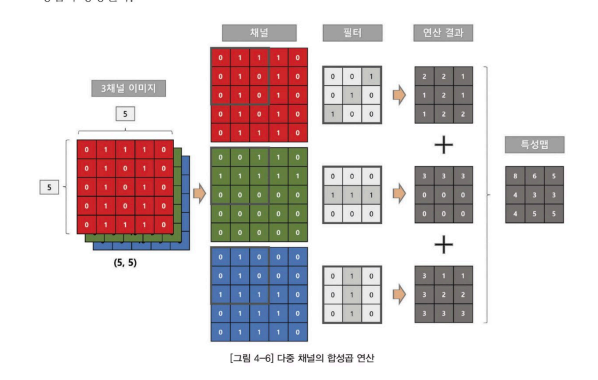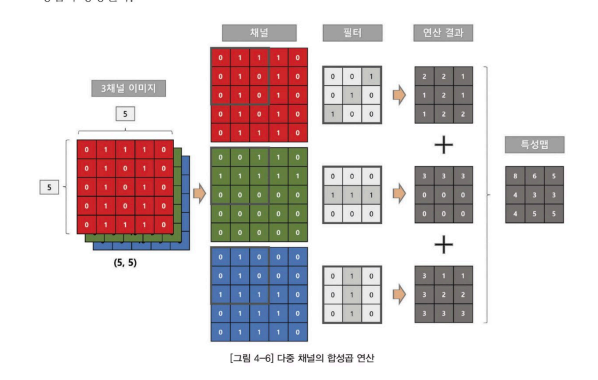)

> - 합성곱 레이어 출력 필터 개수 20개 *  입력 이미지의 채널 개수 3개 = 총 60개의 커널
- 1개 커널 사이즈 3 * 3 인 경우, 해당 층에서 업데이트할 가중치의 그래디언트 총 540개
- bias 추가 계산, 20개의 출력 필터 개수만큼 추가
- 총 560개의 파라미터가 업데이트될 파라미터의 개수

## 1-4 스트라이드

* 스트라이드 : 좌측 상단으로부터 입력 이미지를 기준으로 우측으로 이동하면서 합성곱 연산을 계속 수행하고 특성맵에 결과를 채워나감, 이때 이동하는 간격
 
## 1-5 패딩

패딩을 적용한 후 합성곱 연산을 수행하면 특성맵의 크기가 줄어들지 않음

## 1-6 특성맵 사이즈

## 1-7 풀링
* 풀링 레이어: 추출된 특성맵에 대해 다운 샘플링하여 이미지의 크기를 축소하는 레이어
 - 이미지 축소를 통해 연산량으 감소
 - 과대적합 방지

1. 최대 풀링: 특징의 값이 큰 값이 다른 특징을 대표
2. 평균 풀링

# 2. 간단한 모델 생성

In [ ]:
# tensorflow 모듈 import
import tensorflow as tf
     

# mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_valid, y_valid)=mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


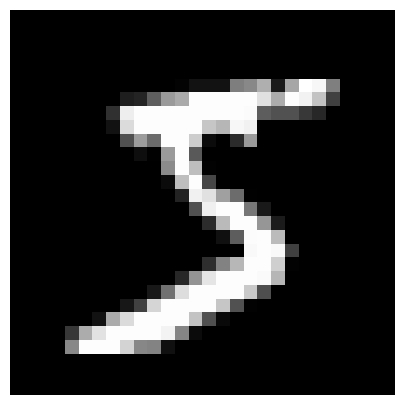

In [ ]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx], cmap='gray')
  plt.axis('off')
  plt.show()

plot_image(x_train, 0)

In [ ]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


In [ ]:
# 정규화(Normalization)
x_train = x_train/255.0
x_valid=x_valid/255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


In [ ]:
# 채널 추가
print(x_train.shape, x_valid.shape)

x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]

print(x_train.shape, x_valid.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28) (10000, 28, 28)



## 2-2 Sequential API 로 모델 생성 및 학습
- 합성곱 레이어 1개, 풀링 레이어 1개를 적용하는 간단한 모델 생성
- Flatten 층을 추가하여 1차원 배열로 펼침
- 합성곱은 Conv2D 레이어를 사용하고, (3, 3) 크기의 서로 - 다른 32가지 종류의 커널 적용, ReLU 활성화 함수 적용
- 풀링 레이어는 (2, 2) 크기로 최대 풀링 적용
- 최종 분류기는 정답 레이블이 10개의 값을 가지므로 10개의 노드 개수를 지정, 활성화 함수로 softmax 적용

In [ ]:
model=tf.keras.Sequential([
    #Convolution 적용 (32 filters)
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', # (3,3) 크기의 서로 다른 32가지 종류 커널
                           input_shape=(28, 28, 1), name='conv'),
    #max pooling 적용
    tf.keras.layers.MaxPooling2D((2,2), name='pool'),
    #classifier 출력층
    tf.keras.layers.Flatten(),    # 1차원 배열로 펼쳐준다
    tf.keras.layers.Dense(10, activation='softmax')   # 다중 분류 문제
])

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history=model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 62s 32ms/step - loss: 0.2096 - accuracy: 0.9406 - val_loss: 0.0923 - val_accuracy: 0.9723
Epoch 2/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0815 - accuracy: 0.9769 - val_loss: 0.0685 - val_accuracy: 0.9770
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0629 - accuracy: 0.9816 - val_loss: 0.0644 - val_accuracy: 0.9787
Epoch 4/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0526 - accuracy: 0.9839 - val_loss: 0.0560 - val_accuracy: 0.9819
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0454 - accuracy: 0.9863 - val_loss: 0.0578 - val_accuracy: 0.9819
Epoch 6/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0386 - accuracy: 0.9882 - val_loss: 0.0613 - val_accuracy: 0.9799
Epoch 7/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0329 - accuracy: 0.9898 - val_loss: 0.0544 -

In [ ]:
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 2s 6ms/step - loss: 0.0556 - accuracy: 0.9844


[0.055552128702402115, 0.9843999743461609]

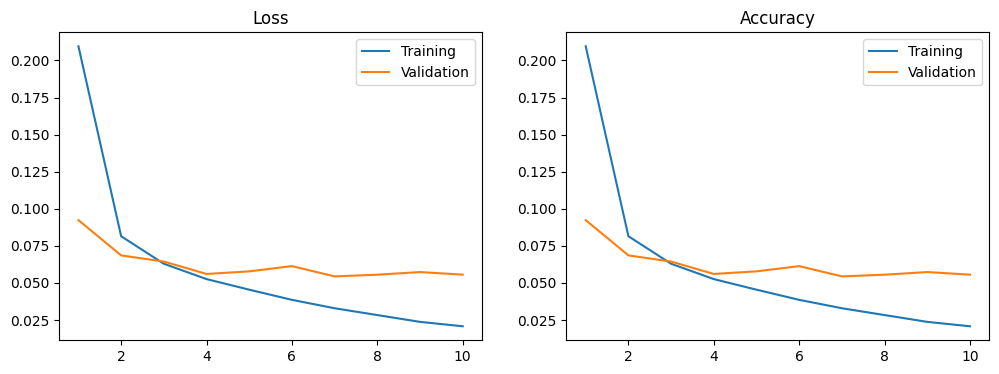

In [ ]:
def plot_loss_acc(history, epoch):
  loss, val_loss=history.history['loss'], history.history['val_loss']
  acc, val_acc=history.history['accuracy'], history.history['val_accuracy']

  fig, axes=plt.subplots(1, 2, figsize=(12, 4))

  axes[0].plot(range(1, epoch+1), loss, label='Training')
  axes[0].plot(range(1, epoch+1), val_loss, label='Validation')
  axes[0].legend(loc='best')
  axes[0].set_title('Loss')

  axes[1].plot(range(1, epoch+1), loss, label='Training')
  axes[1].plot(range(1, epoch+1), val_loss, label='Validation')
  axes[1].legend(loc='best')
  axes[1].set_title('Accuracy')

  plt.show()

plot_loss_acc(history, 10)

## 2-3 모델 구조 파악 



In [ ]:
# 모델 구조
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 입력 형태
model.input


# 출력 형태
model.output


# 레이어
model.layers


# 첫 번째 레이어 선택
model.layers[0]

# 첫 번째 레이어 입력
model.layers[0].input

# 첫 번째 레이어 출력
model.layers[0].output

# 첫 번째 레이어 가중치
model.layers[0].weights

# 첫 번째 레이어 커널 가중치
model.layers[0].kernel

# 첫 번째 레이어 bias 가중치
model.layers[0].bias


# 레이어 이름 사용해 레이어 선택
model.get_layer('conv')

# 샘플 이미지의 레이어별 출력을 리스트에 추가 (첫 번째, 두 번째 레이어)
activator = tf.keras.Model(inputs=model.input, 
                           outputs=[layer.output for layer in model.layers[:2]])
activations=activator.predict(x_train_in[0][tf.newaxis, ...])

len(activations)


# 첫 번재 레이어(conv) 출력층
conv_activation=activations[0]
conv_activation.shape

1/1 [==============================] - 0s 82ms/step


(1, 26, 26, 32)

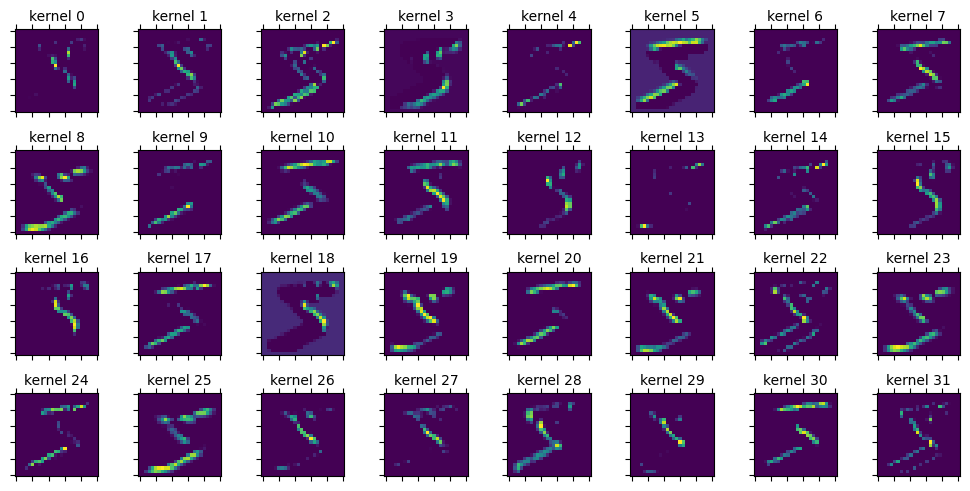

In [ ]:
# Convolution 시각화
fig, axes=plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
  axes[i//8, i%8].matshow(conv_activation[0, :, :, i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

In [ ]:
# 두번째 레이어 pool 출력층
pooling_activation=activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


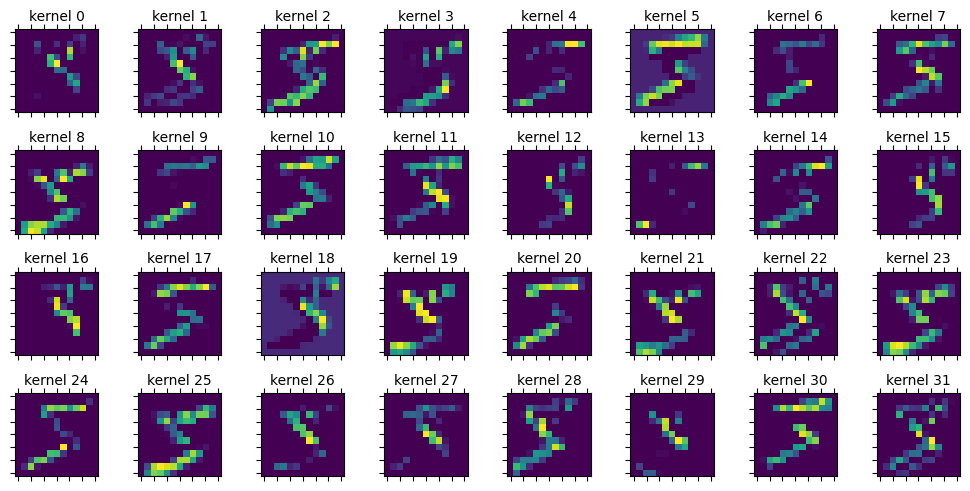

In [ ]:

# 시각화
fig, axes=plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
  axes[i//8, i%8].matshow(pooling_activation[0, :, :, i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

# 3. 복잡한 모델 생성

In [ ]:
import tensorflow as tf
import numpy as np
     

#mnist 손글씨 이미지 데이터 로드
mnist=tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid)=mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
y_train_odd=[]
for y in y_train:
  if y%2==0:
    y_train_odd.append(0)
  else:
    y_train_odd.append(1)

y_train_odd=np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [ ]:
# Validation 데이터셋 처리
y_valid_odd=[]
for y in y_valid:
  if y%2==0:
    y_valid_odd.append(0)
  else:
    y_valid_odd.append(1)

y_valid_odd=np.array(y_valid_odd)
y_valid_odd.shape


(10000,)

In [ ]:

x_train=x_train/255.0
x_valid=x_valid/255.0

# 채널 추가
x_train_in=tf.expand_dims(x_train, -1)
x_valid_in=tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)
x_train=x_train/255.0
x_valid=x_valid/255.0

# 채널 추가
x_train_in=tf.expand_dims(x_train, -1)
x_valid_in=tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000, 28, 28, 1) (10000, 28, 28, 1)


## 3-2 Functional API로 다중 입력, 다중 출력 레이어 생

In [ ]:
# Functional API 를 사용하여 모델 생성

inputs=tf.keras.layers.Input(shape=(28, 28, 1))

conv=tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
pool=tf.keras.layers.MaxPooling2D((2,2))(conv)
flat=tf.keras.layers.Flatten()(pool)

flat_inputs=tf.keras.layers.Flatten()(inputs)
concat=tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs=tf.keras.layers.Dense(10, activation='softmax')(concat)

model=tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_1 (Conv2D)              (None, 26, 26, 32)   320         ['input_2[0][0]']                
                                                                                                  
 max_pooling2d_1 (MaxPooling2D)  (None, 13, 13, 32)  0           ['conv2d_1[0][0]']               
                                                                                                  
 flatten_3 (Flatten)            (None, 5408)         0           ['max_pooling2d_1[0][0]']        
                                                                                            

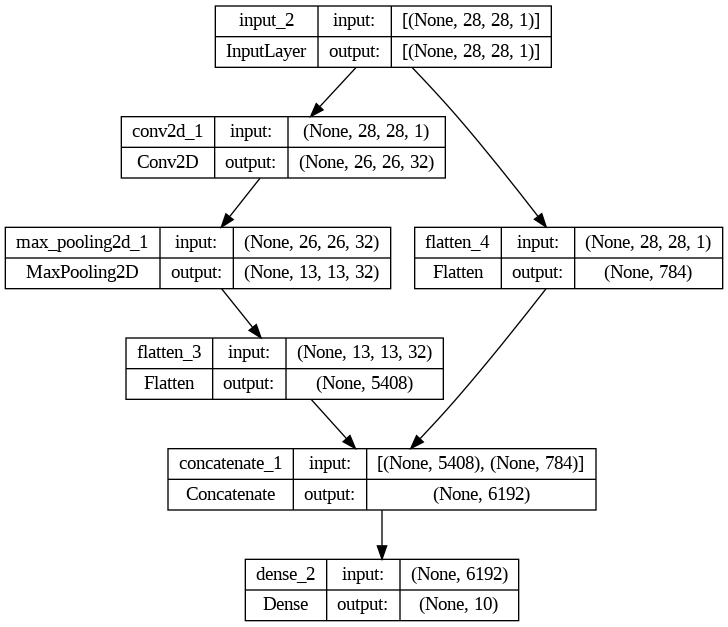

In [ ]:
# 모델 구조 출력 및 이미지 파일로 저장
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='functional_cnn.png')

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history=model.fit(x_train_in, y_train, validation_data=(x_valid, y_valid), epochs=10)

# 모델 성능
val_loss, val_acc=model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 34s 18ms/step - loss: 1.2216 - accuracy: 0.7438 - val_loss: 0.5491 - val_accuracy: 0.8619
Epoch 2/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.4636 - accuracy: 0.8726 - val_loss: 0.3845 - val_accuracy: 0.8918
Epoch 3/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3756 - accuracy: 0.8904 - val_loss: 0.3409 - val_accuracy: 0.9047
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3445 - accuracy: 0.8985 - val_loss: 0.3220 - val_accuracy: 0.9109
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3287 - accuracy: 0.9036 - val_loss: 0.3112 - val_accuracy: 0.9104
Epoch 6/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.3186 - accuracy: 0.9067 - val_loss: 0.3008 - val_accuracy: 0.9128
Epoch 7/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.3112 - accuracy: 0.9085 - val_loss: 0.2953 -

## 3-3 다중 출력 분류 모델


In [ ]:
# Functional API를 사용해 모델 생성

inputs=tf.keras.layers.Input(shape=(28, 28, 1), name='inputs')

conv=tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_layer')(inputs)
pool=tf.keras.layers.MaxPooling2D((2,2), name='maxpool_layer')(conv)
flat=tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs=tf.keras.layers.Flatten()(inputs)
concat=tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs=tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)

odd_outputs=tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model=tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_layer (Conv2D)          (None, 26, 26, 32)   320         ['inputs[0][0]']                 
                                                                                                  
 maxpool_layer (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d_layer[0][0]']           
                                                                                                  
 flatten_layer (Flatten)        (None, 5408)         0           ['maxpool_layer[0][0]']          
                                                                                            

In [ ]:
# 모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


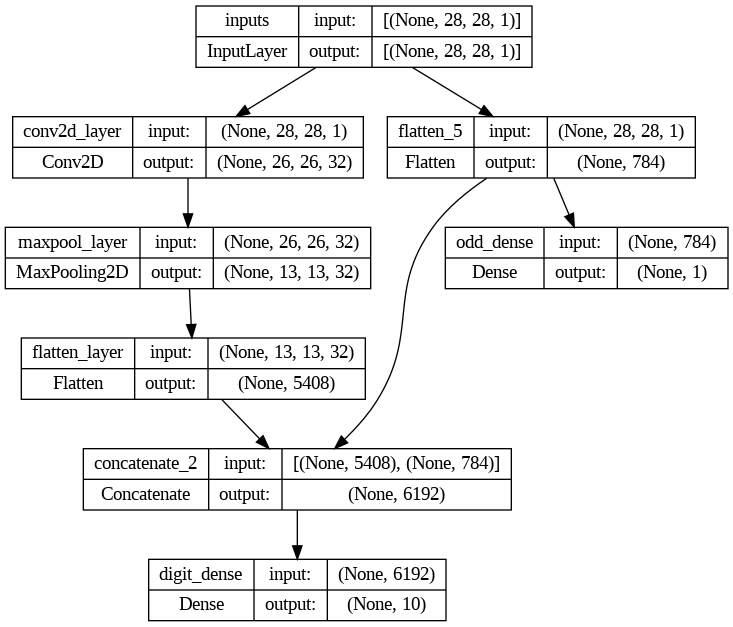

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss={'digit_dense': 'sparse_categorical_crossentropy', 
                    'odd_dense':'binary_crossentropy'},
              loss_weights={'digit_dense':1, 'odd_dense':0.5}, 
              # loss = 1.0 * sparse_categorical_crossentropy + 0.5 * binary_crossentropy
              metrics=['accuracy'])

# 모델 훈련
history=model.fit({'inputs':x_train_in},
                  {'digit_dense':y_train, 'odd_dense':y_train_odd},
                   validation_data=({'inputs':x_valid_in}, {'digit_dense':y_valid, 'odd_dense':y_valid_odd}), epochs=10)
     

Epoch 1/10
1875/1875 [==============================] - 34s 18ms/step - loss: 1.3793 - digit_dense_loss: 1.0447 - odd_dense_loss: 0.6691 - digit_dense_accuracy: 0.7626 - odd_dense_accuracy: 0.7791 - val_loss: 0.7767 - val_digit_dense_loss: 0.4542 - val_odd_dense_loss: 0.6450 - val_digit_dense_accuracy: 0.8789 - val_odd_dense_accuracy: 0.7948
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.7196 - digit_dense_loss: 0.4063 - odd_dense_loss: 0.6268 - digit_dense_accuracy: 0.8838 - odd_dense_accuracy: 0.7980 - val_loss: 0.6506 - val_digit_dense_loss: 0.3479 - val_odd_dense_loss: 0.6053 - val_digit_dense_accuracy: 0.9024 - val_odd_dense_accuracy: 0.7976
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.6431 - digit_dense_loss: 0.3474 - odd_dense_loss: 0.5913 - digit_dense_accuracy: 0.8976 - odd_dense_accuracy: 0.8017 - val_loss: 0.6022 - val_digit_dense_loss: 0.3162 - val_odd_dense_loss: 0.5720 - val_digit_dense_accuracy: 0.9109 -

In [ ]:
# 모델 성능
model.evaluate({'inputs':x_valid_in}, {'digit_dense':y_valid, 'odd_dense':y_valid_odd})

313/313 [==============================] - 2s 7ms/step - loss: 0.4967 - digit_dense_loss: 0.2758 - odd_dense_loss: 0.4418 - digit_dense_accuracy: 0.9202 - odd_dense_accuracy: 0.8266


[0.4966646134853363,
 0.27578434348106384,
 0.4417605400085449,
 0.920199990272522,
 0.8266000151634216]

### 전이 학습

* 전이학습: 앞서 훈련한 모델의 일부를 가져와 그대로 사용하고, 최종 출력층만 새롭게 추가하여 모델을 재구성 하는 것
  - 입력 레이어부터 flatten_layer 라는 name 속성을 갖는 flatten 층까지 해당하는 부분을 따로 출력하여 객체 생성

In [ ]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output=model.get_layer('flatten_layer').output

# 앞의 출력을 출력으로 하는 모델 정의
base_model=tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Sequential API 적용
digit_model=tf.keras.Sequential([
    base_model, tf.keras.layers.Dense(10, activation='softmax')
])
digit_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:

# 모델 컴파일
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history=digit_model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)
     

Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.6671 - accuracy: 0.8422 - val_loss: 0.3646 - val_accuracy: 0.9022
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3498 - accuracy: 0.8992 - val_loss: 0.3111 - val_accuracy: 0.9103
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3157 - accuracy: 0.9078 - val_loss: 0.2923 - val_accuracy: 0.9148
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3021 - accuracy: 0.9120 - val_loss: 0.2847 - val_accuracy: 0.9170
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2945 - accuracy: 0.9137 - val_loss: 0.2858 - val_accuracy: 0.9173
Epoch 6/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2895 - accuracy: 0.9159 - val_loss: 0.2741 - val_accuracy: 0.9198
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2853 - accuracy: 0.9173 - val_loss: 0.2756 -

In [ ]:
# 베이스 모델의 가중치 고정 (Freeze Model)

base_model_frozen=tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen')
base_model_frozen.trainable=False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________
